# Import

In [1]:
# 기본 import
import pandas as pd
import numpy as np
import sklearn

# year 컬럼 생성
from datetime import datetime 

# text 처리
import re
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
import gensim      # 주피터에서는 pip 사용
from gensim.utils import simple_preprocess

# warnings
import warnings
warnings.filterwarnings('ignore')

# wordcloud
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/data/appliances_cleaned.csv')

In [3]:
df.isnull().sum()

rating                  0
reviewer_id             0
product_id              0
unix_review_time        0
category                0
description             0
also_buy                0
brand                4520
main_cat              249
price               96507
review_text             0
rating_class            0
time                    0
dtype: int64

# 텍스트 전처리

In [4]:
def depure_data(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)
        
    return data

In [5]:
temp = []
data_to_list = df['review_text'].values.tolist()
for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))
list(temp[:5])

['Matched pigtail cord and works great. Just what I needed for my electric range. Matched pigtail cord and works great.',
 'complete package I like the fact that the wire ends have mounting tips assembled and that the cord has a strain relief clamp included. Id recommend this to any diy person',
 'Perfect Fit Needed another couple of feet with new dryer, perfect fit. Gives you more options then the shorter cords normally sold.',
 'Everything works Good quality at a reasonable price',
 '50 amp cable Planning on hooking this to my RV']

In [6]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        

data_words = list(sent_to_words(temp))

print(data_words[:10])

[['matched', 'pigtail', 'cord', 'and', 'works', 'great', 'just', 'what', 'needed', 'for', 'my', 'electric', 'range', 'matched', 'pigtail', 'cord', 'and', 'works', 'great'], ['complete', 'package', 'like', 'the', 'fact', 'that', 'the', 'wire', 'ends', 'have', 'mounting', 'tips', 'assembled', 'and', 'that', 'the', 'cord', 'has', 'strain', 'relief', 'clamp', 'included', 'id', 'recommend', 'this', 'to', 'any', 'diy', 'person'], ['perfect', 'fit', 'needed', 'another', 'couple', 'of', 'feet', 'with', 'new', 'dryer', 'perfect', 'fit', 'gives', 'you', 'more', 'options', 'then', 'the', 'shorter', 'cords', 'normally', 'sold'], ['everything', 'works', 'good', 'quality', 'at', 'reasonable', 'price'], ['amp', 'cable', 'planning', 'on', 'hooking', 'this', 'to', 'my', 'rv'], ['good', 'range', 'cord', 'standard', 'nema', 'fits', 'with', 'nema', 'this', 'product', 'is', 'pretty', 'simple', 'one', 'do', 'like', 'prettymuch', 'any', 'product', 'made', 'by', 'southwire', 'they', 'make', 'good', 'stuff', '

In [7]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [8]:
data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])

['matched pigtail cord and works great just what needed for my electric range matched pigtail cord and works great', 'complete package like the fact that the wire ends have mounting tips assembled and that the cord has strain relief clamp included id recommend this to any diy person', 'perfect fit needed another couple of feet with new dryer perfect fit gives you more options then the shorter cords normally sold', 'everything works good quality at reasonable price', 'amp cable planning on hooking this to my rv']


In [9]:
df['clean_text'] = data

In [10]:
df.head()

,rating,reviewer_id,product_id,unix_review_time,category,description,also_buy,brand,main_cat,price,review_text,rating_class,time,clean_text
0,5,A3SHVDMM83IHJ4,B00002N7IL,1426809600,"['Appliances', 'Parts & Accessories', 'Range P...",['Outfit your dryer with top-notch connections...,"['B000FK9X6W', 'B000BPFZHM', 'B000FP8LK6', 'B0...",Leviton,Tools & Home Improvement,NaN,Matched pigtail cord and works great. Just wha...,good,2015-03-20,matched pigtail cord and works great just what...
1,5,A2OXDRWBASV91Y,B00004SQHD,1366416000,"['Appliances', 'Parts & Accessories', 'Range P...",['Coleman Cable 09045 5-Foot Range Cord Made o...,[],Coleman Cable,Tools & Home Improvement,$1.41,complete package I like the fact that the wire...,good,2013-04-20,complete package like the fact that the wire e...
2,5,A2KG6AWJSWILPR,B00004SQHD,1363392000,"['Appliances', 'Parts & Accessories', 'Range P...",['Coleman Cable 09045 5-Foot Range Cord Made o...,[],Coleman Cable,Tools & Home Improvement,$1.41,Perfect Fit Needed another couple of feet with...,good,2013-03-16,perfect fit needed another couple of feet with...
3,5,A2CBE6VYOARZN4,B00004SQHD,1487030400,"['Appliances', 'Parts & Accessories', 'Range P...",['Coleman Cable 09045 5-Foot Range Cord Made o...,[],Coleman Cable,Tools & Home Improvement,$1.41,Everything works Good quality at a reasonable ...,good,2017-02-14,everything works good quality at reasonable price
4,5,AVKOTZD5ZIOX5,B00004SQHD,1482278400,"['Appliances', 'Parts & Accessories', 'Range P...",['Coleman Cable 09045 5-Foot Range Cord Made o...,[],Coleman Cable,Tools & Home Improvement,$1.41,50 amp cable Planning on hooking this to my RV,good,2016-12-21,amp cable planning on hooking this to my rv


# 필요한 컬럼 생성: review_length, year

In [11]:
# year 컬럼 추가
# time 컬럼을 datetime 타입으로 변환 후 연도만 빼서 year 컬럼 추가
df['time'] = pd.to_datetime(df['time'], format = '%Y-%m-%d')
df['year'] = df['time'].dt.year

In [12]:
# review_length 컬럼 추가
def length(text):
    length = len([w for w in nltk.word_tokenize(text)])
    return length
df['review_length'] = df['review_text'].apply(length)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552342 entries, 0 to 552341
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   rating            552342 non-null  int64         
 1   reviewer_id       552342 non-null  object        
 2   product_id        552342 non-null  object        
 3   unix_review_time  552342 non-null  int64         
 4   category          552342 non-null  object        
 5   description       552342 non-null  object        
 6   also_buy          552342 non-null  object        
 7   brand             547822 non-null  object        
 8   main_cat          552093 non-null  object        
 9   price             455835 non-null  object        
 10  review_text       552342 non-null  object        
 11  rating_class      552342 non-null  object        
 12  time              552342 non-null  datetime64[ns]
 13  clean_text        552342 non-null  object        
 14  year

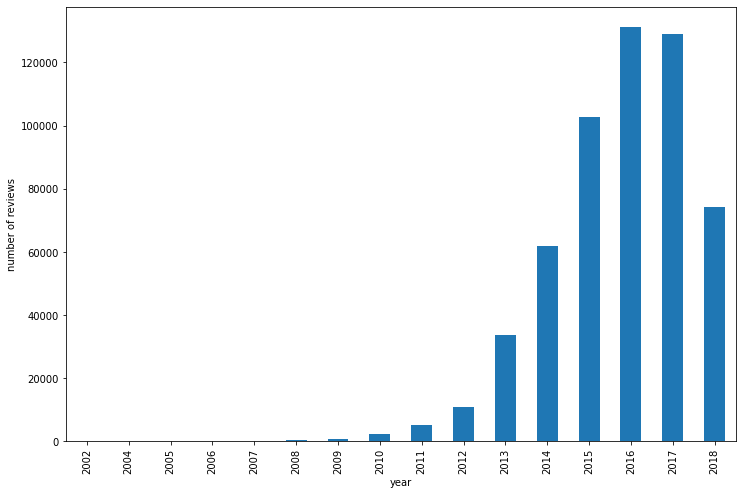

In [13]:
# 연도별 리뷰개수 분포
plt.figure(figsize=(12, 8))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('year')
plt.ylabel('number of reviews')
plt.show()

In [14]:
# 2014~2018 5년으로 잘라볼까.
df = df.drop(df[(df['year'] > 2013) & (df['year'] < 2019)].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53316 entries, 1 to 544343
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rating            53316 non-null  int64         
 1   reviewer_id       53316 non-null  object        
 2   product_id        53316 non-null  object        
 3   unix_review_time  53316 non-null  int64         
 4   category          53316 non-null  object        
 5   description       53316 non-null  object        
 6   also_buy          53316 non-null  object        
 7   brand             52850 non-null  object        
 8   main_cat          53265 non-null  object        
 9   price             41447 non-null  object        
 10  review_text       53316 non-null  object        
 11  rating_class      53316 non-null  object        
 12  time              53316 non-null  datetime64[ns]
 13  clean_text        53316 non-null  object        
 14  year              533

In [15]:
df['review_length'].describe()

count    53316.000000
mean        69.602465
std         77.295452
min          2.000000
25%         31.000000
50%         44.000000
75%         77.000000
max       2514.000000
Name: review_length, dtype: float64

## 섞지 않음

In [ ]:
# 몇 자 초과로 자르는 게 나을까? 일단 20 이상만 남기는 걸로?
# 자꾸 터지므로 10_000개만 해 보겠음. 터지므로 5_000개만 한다.
df2 = df.drop(df[(df['review_length'] < 20)].index)
df2 = df2.head(5_000)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 24361
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rating            5000 non-null   int64         
 1   reviewer_id       5000 non-null   object        
 2   product_id        5000 non-null   object        
 3   unix_review_time  5000 non-null   int64         
 4   category          5000 non-null   object        
 5   description       5000 non-null   object        
 6   also_buy          5000 non-null   object        
 7   brand             5000 non-null   object        
 8   main_cat          5000 non-null   object        
 9   price             4044 non-null   object        
 10  review_text       5000 non-null   object        
 11  rating_class      5000 non-null   object        
 12  time              5000 non-null   datetime64[ns]
 13  clean_text        5000 non-null   object        
 14  year              5000 

In [ ]:
# rating_class를 0, 1로 바꾼 rating_class_num 컬럼 생성
df2['rating_class_num'] = df2['rating_class'].map({'good':1, 'bad':0})

In [ ]:
# clean_text와 rating_class_num만으로 이루어진 df 생성
text_rate = df2[['clean_text', 'rating_class_num']].reset_index()

## Wordcloud 생성을 위한 처리

In [16]:
# countvectorizer 생성
countVec = CountVectorizer(ngram_range=(1, 2), binary=True)

In [ ]:
# clean_text를 countvectorizer에 fit
countVec.fit(text_rate['clean_text'])

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
# transform the matrix
transformed_matrix = countVec.transform(text_rate['clean_text'])

In [ ]:
# convert matrix to array
a = transformed_matrix.toarray()

In [ ]:
# extract the feature names
names = countVec.get_feature_names()

In [ ]:
# add a 'rating' column from previous dataframe's rating value
text_rate_num = pd.DataFrame(a, columns=names)
text_rate_num['rating'] = text_rate['rating_class_num']

In [ ]:
# 이런 모양입니다.
text_rate_num.head()

,aa,aa or,aa series,aaa,aaa battery,aaa for,aaa its,aat,aat freezer,aback,aback by,abandons,abandons supporting,abc,abc defghi,abd,abd small,ability,ability as,ability but,ability great,ability of,ability purchased,ability should,ability to,able,able find,able if,able to,abnormalty,abnormalty and,abolutely,abolutely no,abouit,about,about accuracy,about after,about all,about almost,about amazon,...,yucky stuff,yucky unit,yuk,yuk these,yup,yup didnt,zealand,zealand at,zero,zero air,zero and,zero complaints,zero filter,zero intelligence,zero internal,zero issues,zero mice,zero packaging,zero protection,zero reduction,zero response,zero star,zero stars,zero water,zip,zip lock,zip them,zip ties,ziploc,ziploc bag,ziplock,ziplock bag,ziplock bags,ziplock that,zipties,zipties and,zone,zone after,zone healthy,zone some
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# create lists for forming a dataframe summary
feature_names = []
avg_ratings = []
rating_counts = []
for name in names:
    if name != 'rating':
        avg_rating = text_rate_num[text_rate_num[name]==1]['rating'].mean()
        rating_count = text_rate_num[text_rate_num[name]==1]['rating'].count()
        if rating_count > 20:
            feature_names.append(name)
            avg_ratings.append(avg_rating)
            rating_counts.append(rating_count)

In [ ]:
# create a new df from words, average ratings, and rating counts
summary = pd.DataFrame({'feature_name':feature_names, 'avg_rating':avg_ratings, 'rating_count':rating_counts})

In [ ]:
summary

,feature_name,avg_rating,rating_count
0,able,0.894410,161
1,able to,0.893082,159
2,about,0.888136,590
3,about it,0.871795,39
4,about minutes,0.920000,25
...,...,...,...
2547,youll,0.903226,31
2548,your,0.858006,331
2549,your humidifier,0.954545,22
2550,youre,0.825397,63


## WordCloud

In [ ]:
# Good rating words
# words that are commonly used in the reviews which have good ratings
df_good = summary.sort_values(by='avg_rating', ascending=False)[:50]
df_good

,feature_name,avg_rating,rating_count
795,great product,1.0,180
2452,will definitely,1.0,26
862,highly,1.0,105
2015,the name,1.0,28
828,has the,1.0,24
819,happy to,1.0,28
816,handy,1.0,28
804,had any,1.0,23
181,at good,1.0,26
800,great with,1.0,24


In [ ]:
wc_good = dict(zip(df_good['feature_name'].tolist(), df_good['avg_rating'].tolist()))

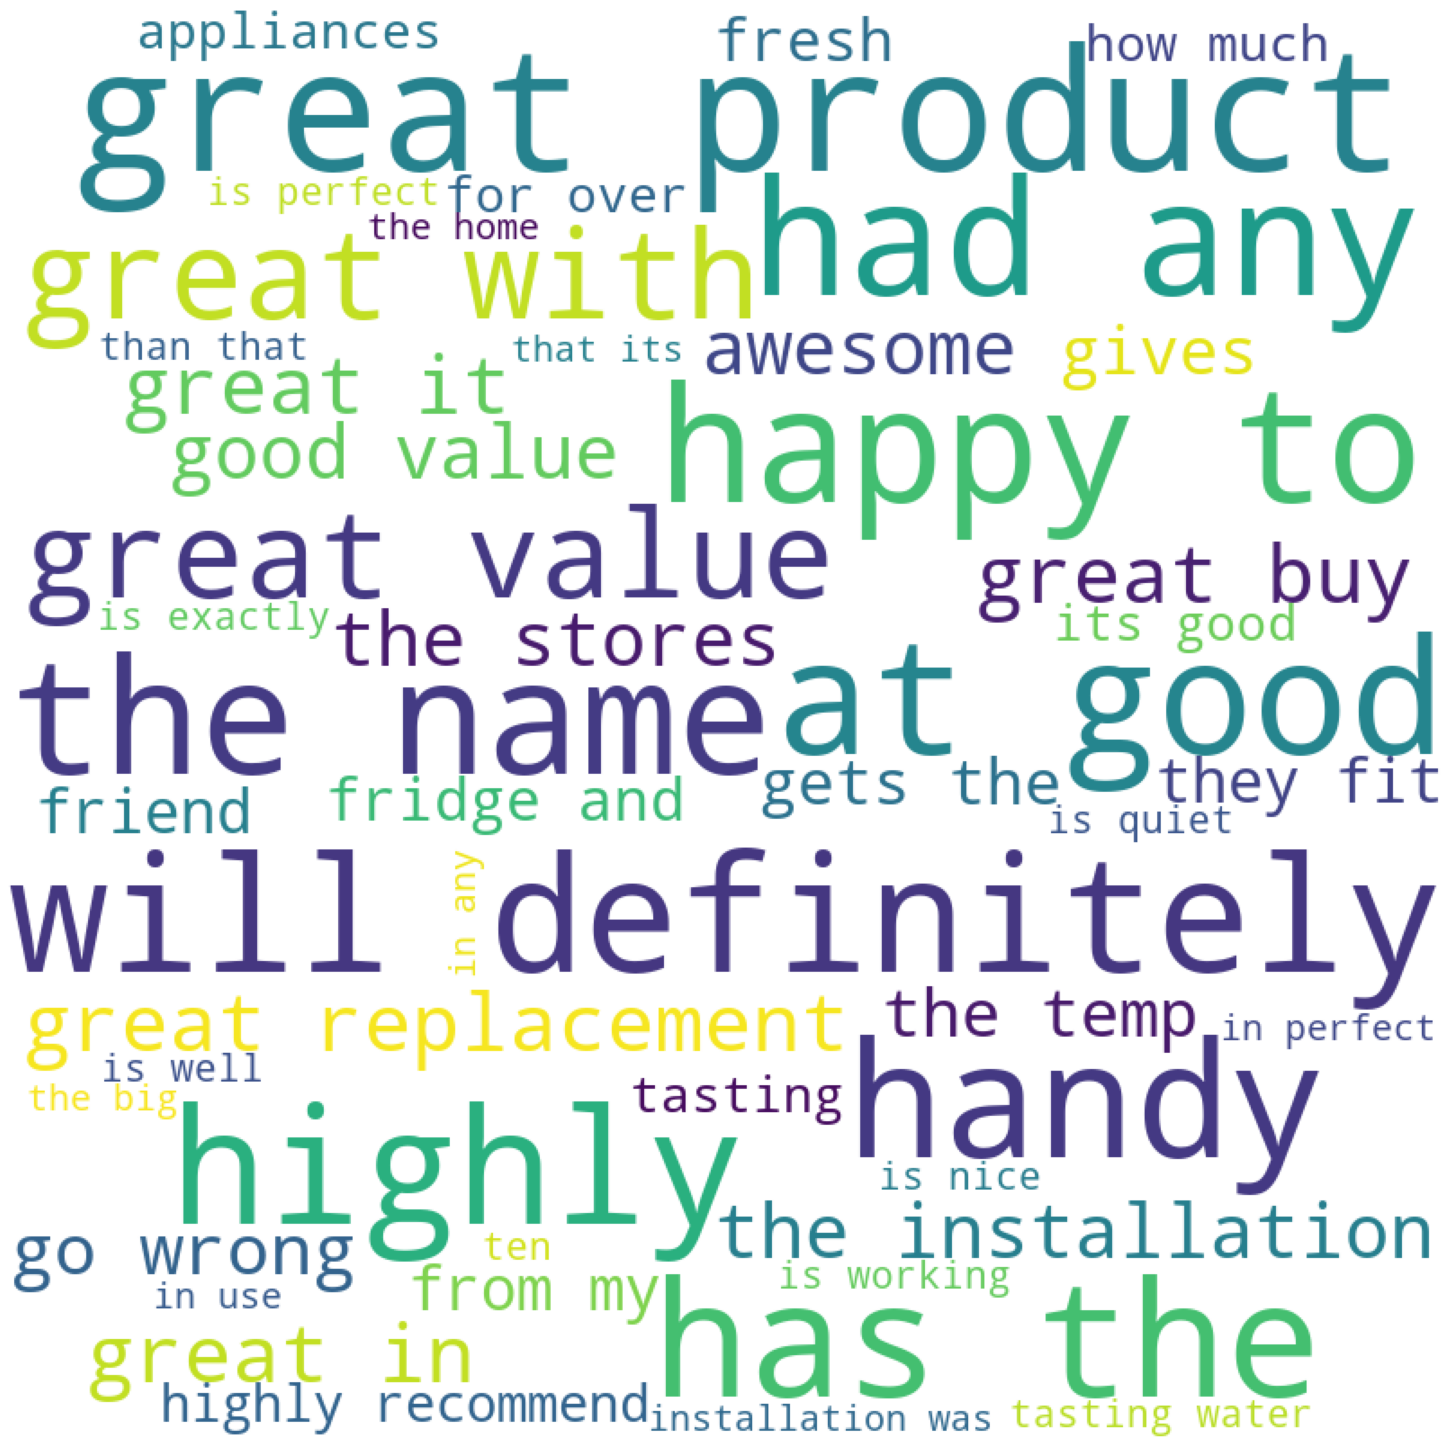

In [ ]:
# generate a wordcloud image
wordcloud = WordCloud(width=800, height=800,
                     background_color='white',
                     min_font_size=10).generate_from_frequencies(wc_good)

plt.figure(figsize=(20, 20), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Bad rating words
# words that are commonly used in the reviews which have bad ratings
df_bad = summary.sort_values(by='avg_rating', ascending=True)[:50]

In [ ]:
wc_bad = dict(zip(df_bad['feature_name'].tolist(), df_bad['avg_rating'].tolist()))

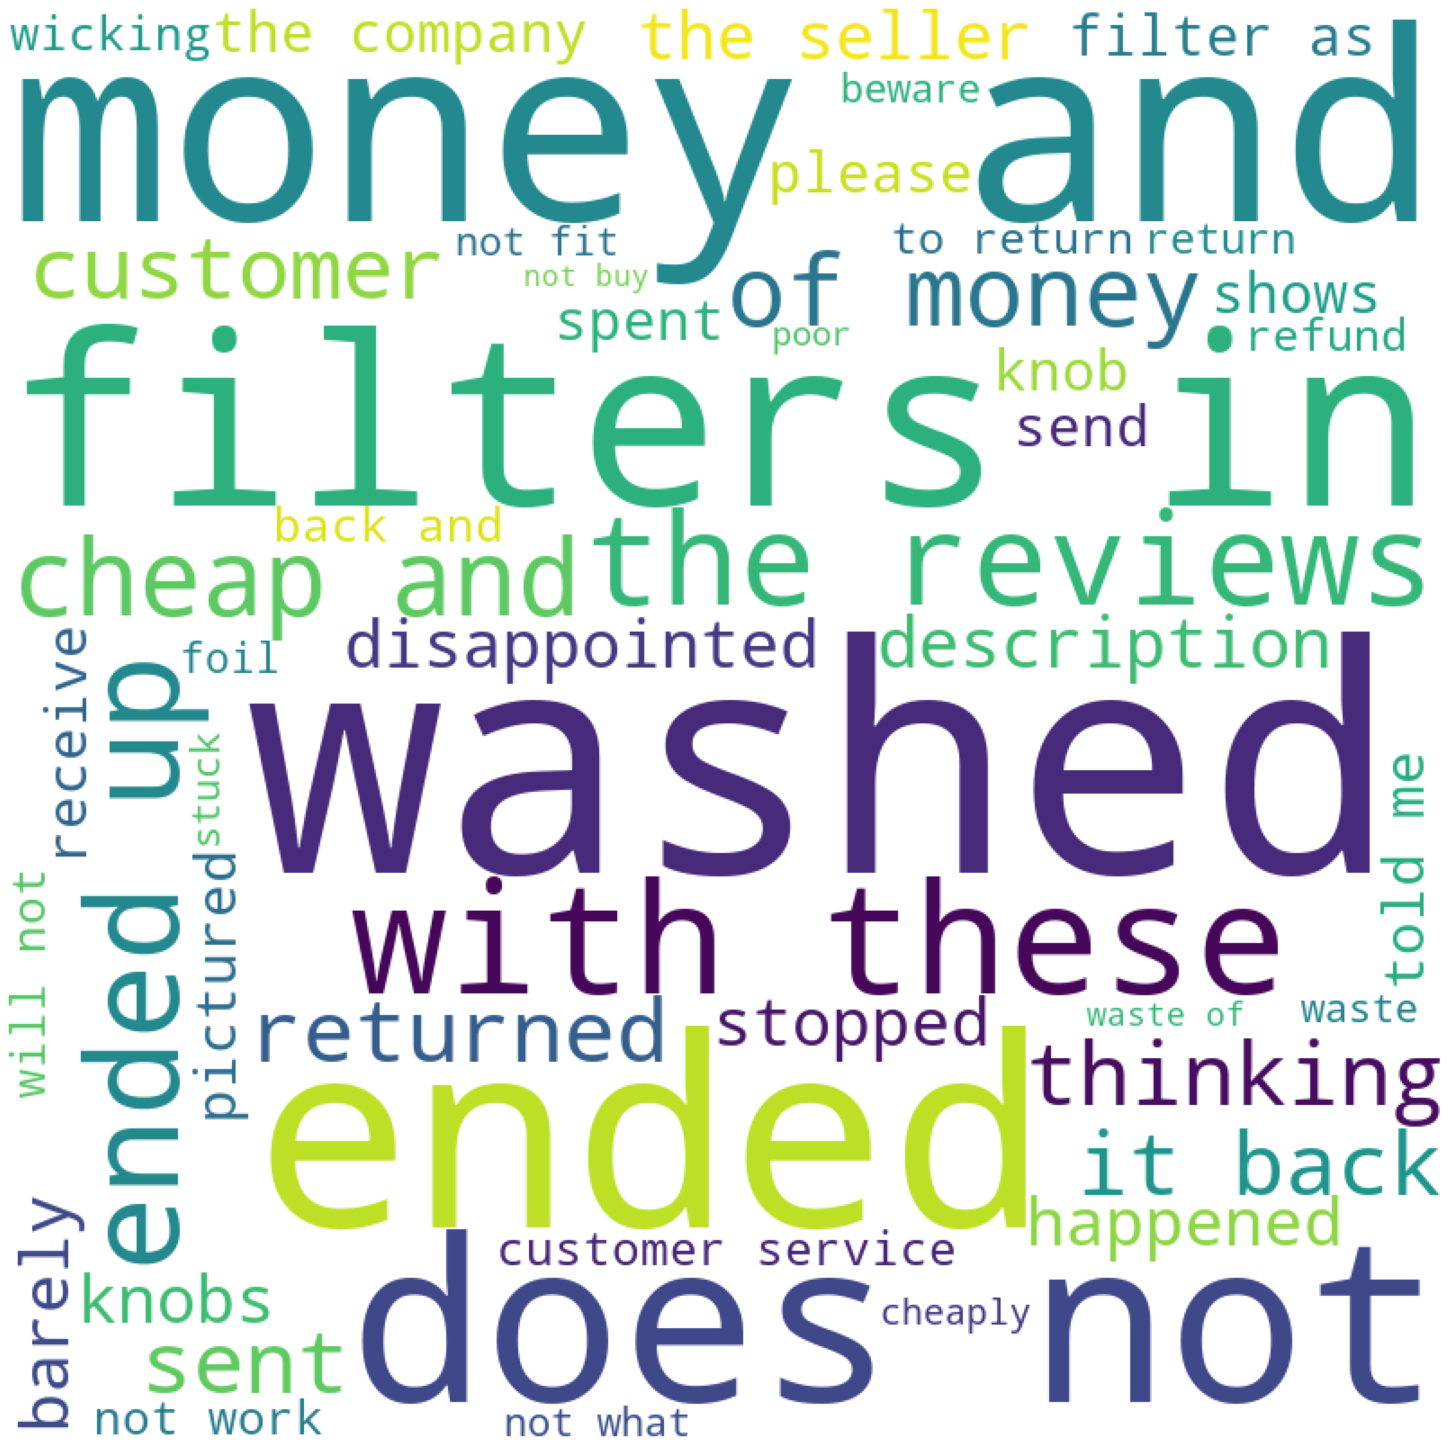

In [ ]:
# generate a wordcloud image
wordcloud = WordCloud(width=800, height=800,
                     background_color='white',
                     min_font_size=10).generate_from_frequencies(wc_bad)

plt.figure(figsize=(20, 20), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# 섞음

In [17]:
# 몇 자 초과로 자르는 게 나을까? 일단 20 이상만 남기는 걸로?
# 자꾸 터지므로 10_000개만 해 보겠음. 터지므로 5_000개만 한다.
df_shuffle = df.drop(df[(df['review_length'] < 20)].index)
df_shuffle = sklearn.utils.shuffle(df_shuffle)
df_shuffle = df_shuffle.head(5_000)
df_shuffle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 57523 to 2883
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rating            5000 non-null   int64         
 1   reviewer_id       5000 non-null   object        
 2   product_id        5000 non-null   object        
 3   unix_review_time  5000 non-null   int64         
 4   category          5000 non-null   object        
 5   description       5000 non-null   object        
 6   also_buy          5000 non-null   object        
 7   brand             4954 non-null   object        
 8   main_cat          4999 non-null   object        
 9   price             3870 non-null   object        
 10  review_text       5000 non-null   object        
 11  rating_class      5000 non-null   object        
 12  time              5000 non-null   datetime64[ns]
 13  clean_text        5000 non-null   object        
 14  year              50

In [18]:
# rating_class를 0, 1로 바꾼 rating_class_num 컬럼 생성
df_shuffle['rating_class_num'] = df_shuffle['rating_class'].map({'good':1, 'bad':0})

In [19]:
# clean_text와 rating_class_num만으로 이루어진 df 생성
text_rate_shuffle = df_shuffle[['clean_text', 'rating_class_num']].reset_index()

In [20]:
# countvectorizer 생성
countVec = CountVectorizer(ngram_range=(1, 2), binary=True)

In [21]:
# clean_text를 countvectorizer에 fit
countVec.fit(text_rate_shuffle['clean_text'])

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [22]:
# transform the matrix
transformed_matrix = countVec.transform(text_rate_shuffle['clean_text'])
# convert matrix to array
a = transformed_matrix.toarray()
# extract the feature names
names = countVec.get_feature_names()
# add a 'rating' column from previous dataframe's rating value
text_rate_num2 = pd.DataFrame(a, columns=names)
text_rate_num2['rating'] = text_rate_shuffle['rating_class_num']

In [23]:
# 이런 모양입니다.
text_rate_num2.head()

,aa,aa additional,aaa,aaa batteries,aaa battery,aam,aam it,aars,aars feel,aas,aas oven,abate,abate the,abd,abd small,abide,abide by,abilities,abilities passed,ability,ability after,ability to,ability you,able,able be,able instead,able to,abolutely,abolutely no,about,about after,about all,about an,about and,about any,about anyone,about anything,about as,about at,about bags,...,yrs much,yrs old,yrs out,yuck,yuck then,yucky,yucky stuff,yum,yup,yup its,zags,zags the,zapping,zapping eachother,zero,zero back,zero condensor,zero for,zero heard,zero model,zero now,zero problems,zero repairman,zero star,zero stars,zig,zig zags,zip,zip pocket,zip tie,zip ties,ziploc,ziploc bag,ziploc freezer,zips,zips and,zoe,zone,zone and,zone but
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# create lists for forming a dataframe summary
feature_names = []
avg_ratings = []
rating_counts = []
for name in names:
    if name != 'rating':
        avg_rating = text_rate_num2[text_rate_num2[name]==1]['rating'].mean()
        rating_count = text_rate_num2[text_rate_num2[name]==1]['rating'].count()
        if rating_count > 20:
            feature_names.append(name)
            avg_ratings.append(avg_rating)
            rating_counts.append(rating_count)

In [25]:
# create a new df from words, average ratings, and rating counts
summary2 = pd.DataFrame({'feature_name':feature_names, 'avg_rating':avg_ratings, 'rating_count':rating_counts})

In [26]:
summary2

,feature_name,avg_rating,rating_count
0,able,0.880208,192
1,able to,0.879581,191
2,about,0.849379,644
3,about it,0.958333,24
4,about minutes,0.955882,68
...,...,...,...
2695,your money,0.166667,30
2696,youre,0.888889,54
2697,yourself,0.888889,54
2698,youtube,0.952381,84


In [27]:
# Good rating words
# words that are commonly used in the reviews which have good ratings
df_good2 = summary2.sort_values(by='avg_rating', ascending=False)[:50]
df_good2

,feature_name,avg_rating,rating_count
125,and seems,1.0,26
609,exactly as,1.0,87
124,and saved,1.0,39
2435,very easy,1.0,110
638,far so,1.0,40
881,has worked,1.0,32
621,expected and,1.0,31
614,excellent product,1.0,36
1387,my year,1.0,26
610,exactly like,1.0,21


In [28]:
wc_good2 = dict(zip(df_good2['feature_name'].tolist(), df_good2['avg_rating'].tolist()))

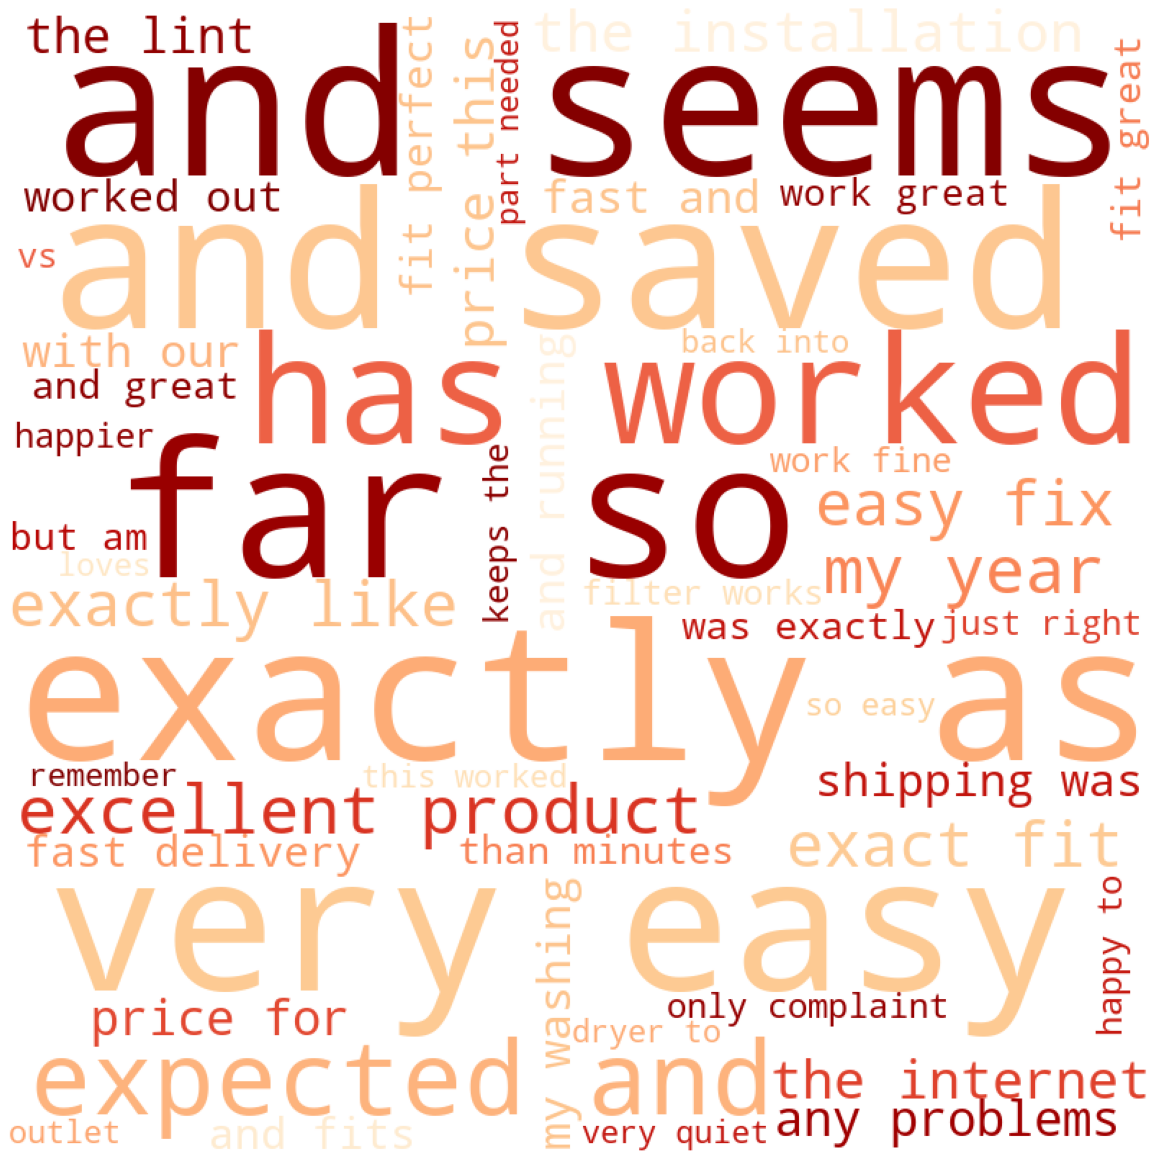

In [34]:
# generate a wordcloud image
wordcloud = WordCloud(width=800, height=800,
                     background_color='white',
                     colormap='OrRd',
                     min_font_size=10).generate_from_frequencies(wc_good2)

plt.figure(figsize=(16, 16), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [35]:
# Bad rating words
# words that are commonly used in the reviews which have bad ratings
df_bad2 = summary2.sort_values(by='avg_rating', ascending=True)[:50]

In [36]:
wc_bad2 = dict(zip(df_bad2['feature_name'].tolist(), df_bad2['avg_rating'].tolist()))

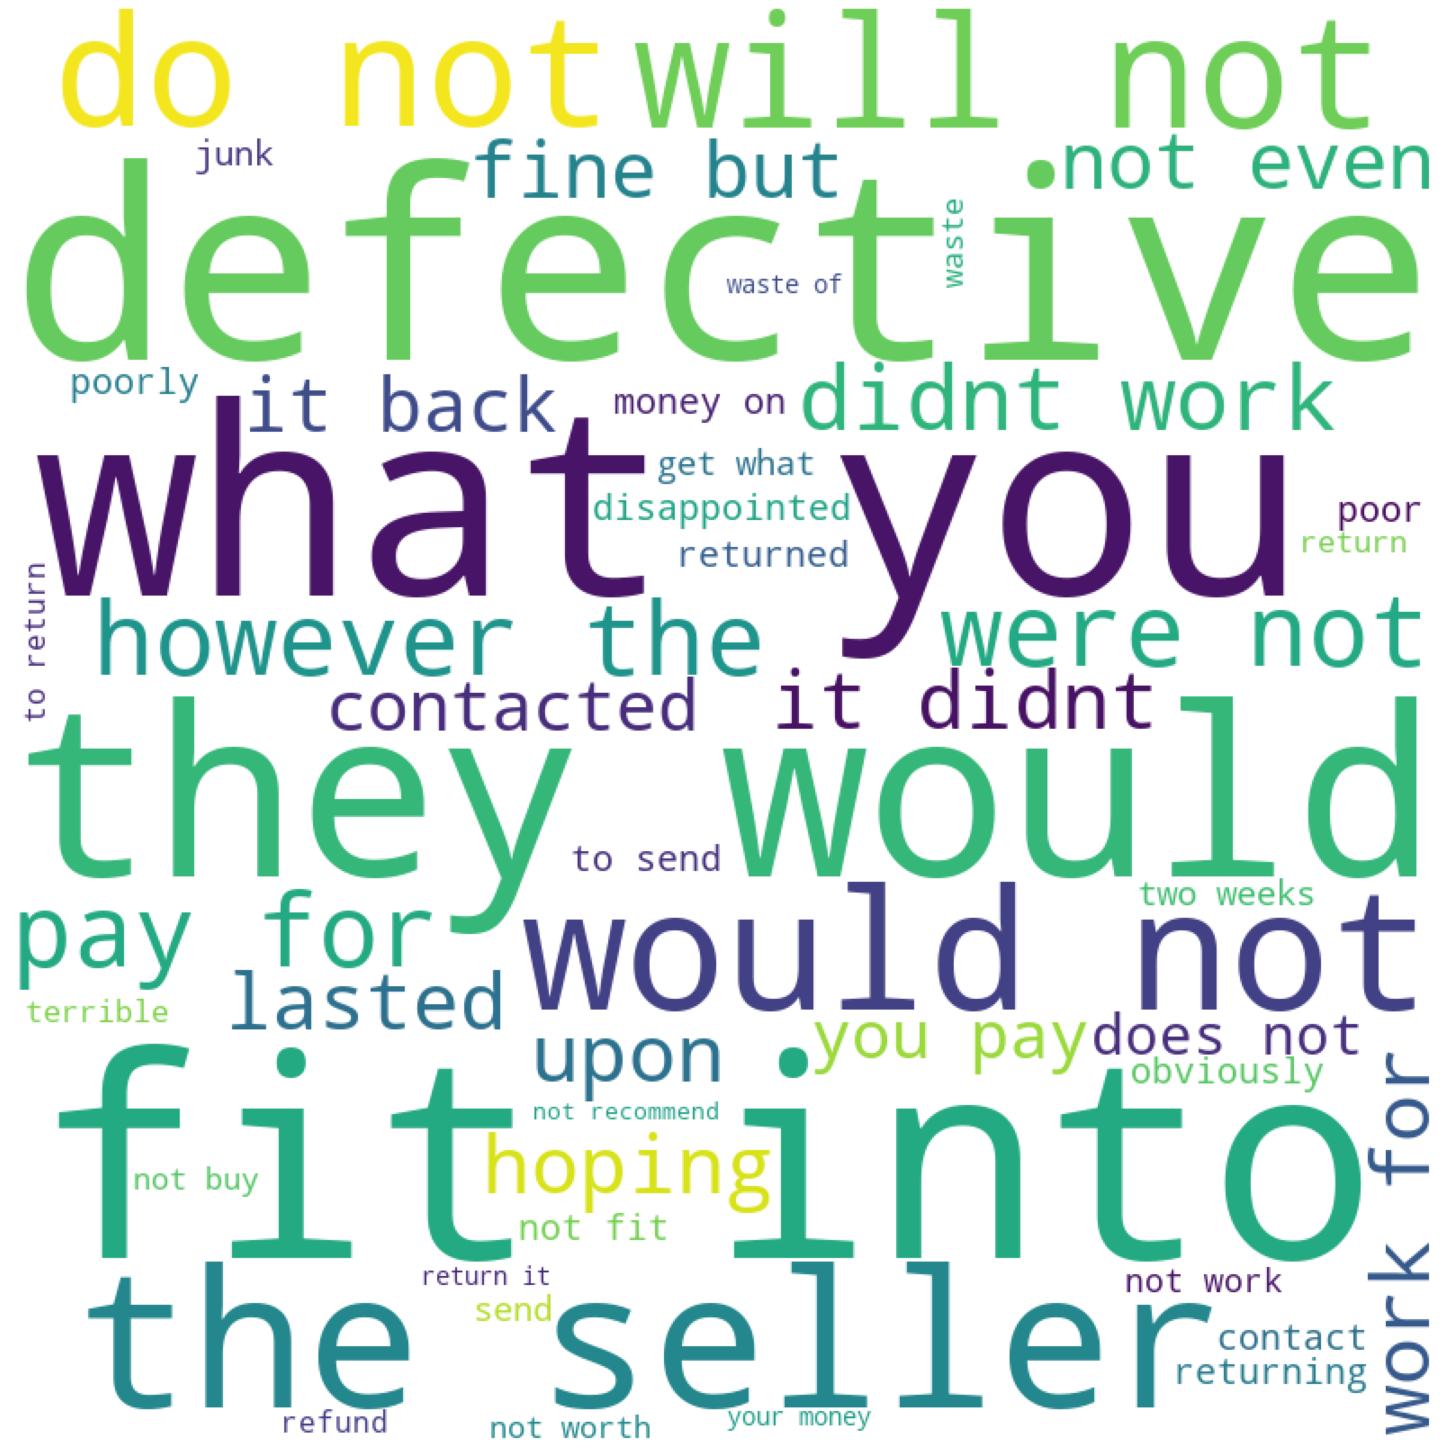

In [37]:
# generate a wordcloud image
wordcloud = WordCloud(width=800, height=800,
                     background_color='white',
                     min_font_size=10).generate_from_frequencies(wc_bad2)

plt.figure(figsize=(20, 20), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()